In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [15]:
breast = datasets.load_breast_cancer()

X = breast.data
y = breast.target

In [19]:
accuracies = []
misclassifications = 0
tumor_type = list(breast.target_names)

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125)

    model = Perceptron(eta0=0.005, random_state=5)
    model.fit(X_train, y_train)

    cur_acc = model.score(X_test, y_test)
    accuracies.append(cur_acc)
    
    prediction = model.predict(X_test)
    if tumor_type[prediction[i]] != tumor_type[y_test[i]]:
        misclassifications += 1

    print(f"Prediction:\t{tumor_type[prediction[i]].ljust(10)}"\
          f"\tActual: {tumor_type[y_test[i]].ljust(10)}"\
          f"\tAccuracy: {str(round(cur_acc * 100, 2)).ljust(5)}%")

avg_acc = round(sum(accuracies) / len(accuracies), 2)
print(f"\nAverage Accuracy: {avg_acc * 100}%")
print(f"Misclassifications: {misclassifications}")

Prediction:	benign    	Actual: benign    	Accuracy: 93.06%
Prediction:	benign    	Actual: benign    	Accuracy: 90.28%
Prediction:	malignant 	Actual: malignant 	Accuracy: 88.89%
Prediction:	benign    	Actual: benign    	Accuracy: 86.11%
Prediction:	benign    	Actual: benign    	Accuracy: 83.33%
Prediction:	benign    	Actual: benign    	Accuracy: 93.06%
Prediction:	malignant 	Actual: malignant 	Accuracy: 87.5 %
Prediction:	benign    	Actual: benign    	Accuracy: 79.17%
Prediction:	benign    	Actual: benign    	Accuracy: 90.28%
Prediction:	benign    	Actual: benign    	Accuracy: 91.67%
Prediction:	benign    	Actual: benign    	Accuracy: 79.17%
Prediction:	malignant 	Actual: malignant 	Accuracy: 70.83%
Prediction:	malignant 	Actual: malignant 	Accuracy: 91.67%
Prediction:	malignant 	Actual: benign    	Accuracy: 55.56%
Prediction:	malignant 	Actual: malignant 	Accuracy: 79.17%
Prediction:	benign    	Actual: benign    	Accuracy: 93.06%
Prediction:	malignant 	Actual: benign    	Accuracy: 87.5

Text(0, 0.5, 'mean texture')

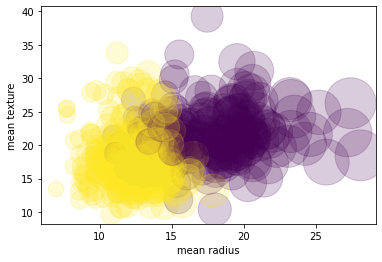

In [17]:
features = breast.data.T

plot_x = features[0]
plot_y = features[1]
area = 100 + features[3]
plt.scatter(plot_x, plot_y, alpha=0.2, s=area, c=breast.target, cmap="viridis")
plt.xlabel(breast.feature_names[0])
plt.ylabel(breast.feature_names[1])